In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np

In [152]:
train_identity = pd.read_csv("train_identity.csv")
train_transaction = pd.read_csv("train_transaction.csv")

In [3]:
print(train_identity.shape)
print(train_transaction.shape)

(144233, 41)
(590540, 394)


In [153]:
test_identity = pd.read_csv("test_identity.csv")
test_transaction = pd.read_csv("test_transaction.csv")

In [5]:
print(test_identity.shape)
print(test_transaction.shape)

(141907, 41)
(506691, 393)


In [154]:
#merging train_transaction(test) and train_identity(test) datasets. 
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left') 

In [155]:
#deleting separate files
del train_transaction, train_identity, test_transaction, test_identity

In [8]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [9]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


In [10]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_cols == one_value_cols_test

False

In [11]:
print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_cols_test)} columns in test dataset with one unique value.')

There are 0 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


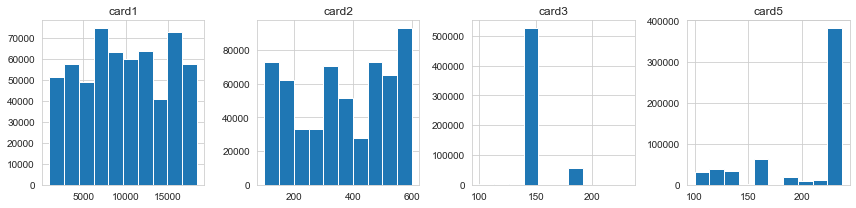

In [12]:
fig = plt.figure(figsize=(12,3))
cards = ['card1', 'card2', 'card3', 'card5']
for i in range(len(cards)):
  fig.add_subplot(1,4,i+1)
  plt.hist(train[cards[i]].dropna())
  plt.title(cards[i])

plt.tight_layout()
plt.show()

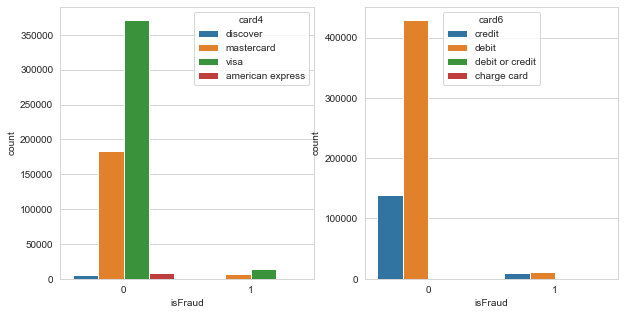

In [13]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1, 2, 1)
sns.countplot(x = train.isFraud, hue = train.card4 )
fig.add_subplot(1, 2, 2)
sns.countplot(x = train.isFraud, hue = train.card6 )
plt.show()

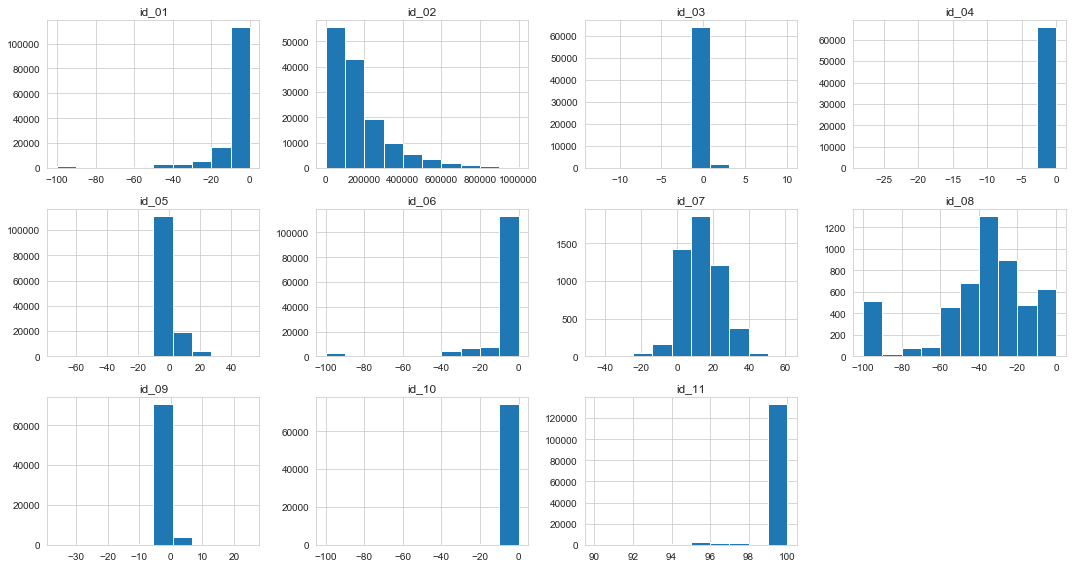

In [14]:
#id_01 to id_11 are represnt numerical values. Other id represnt categorical variables
fig = plt.figure(figsize = (15,8) )
id_cols = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10','id_11']
for i in range(len(id_cols)):
  fig.add_subplot(3, 4, i+1)
  plt.hist(train[id_cols[i]].dropna())
  plt.title(id_cols[i])

plt.tight_layout()
plt.show()

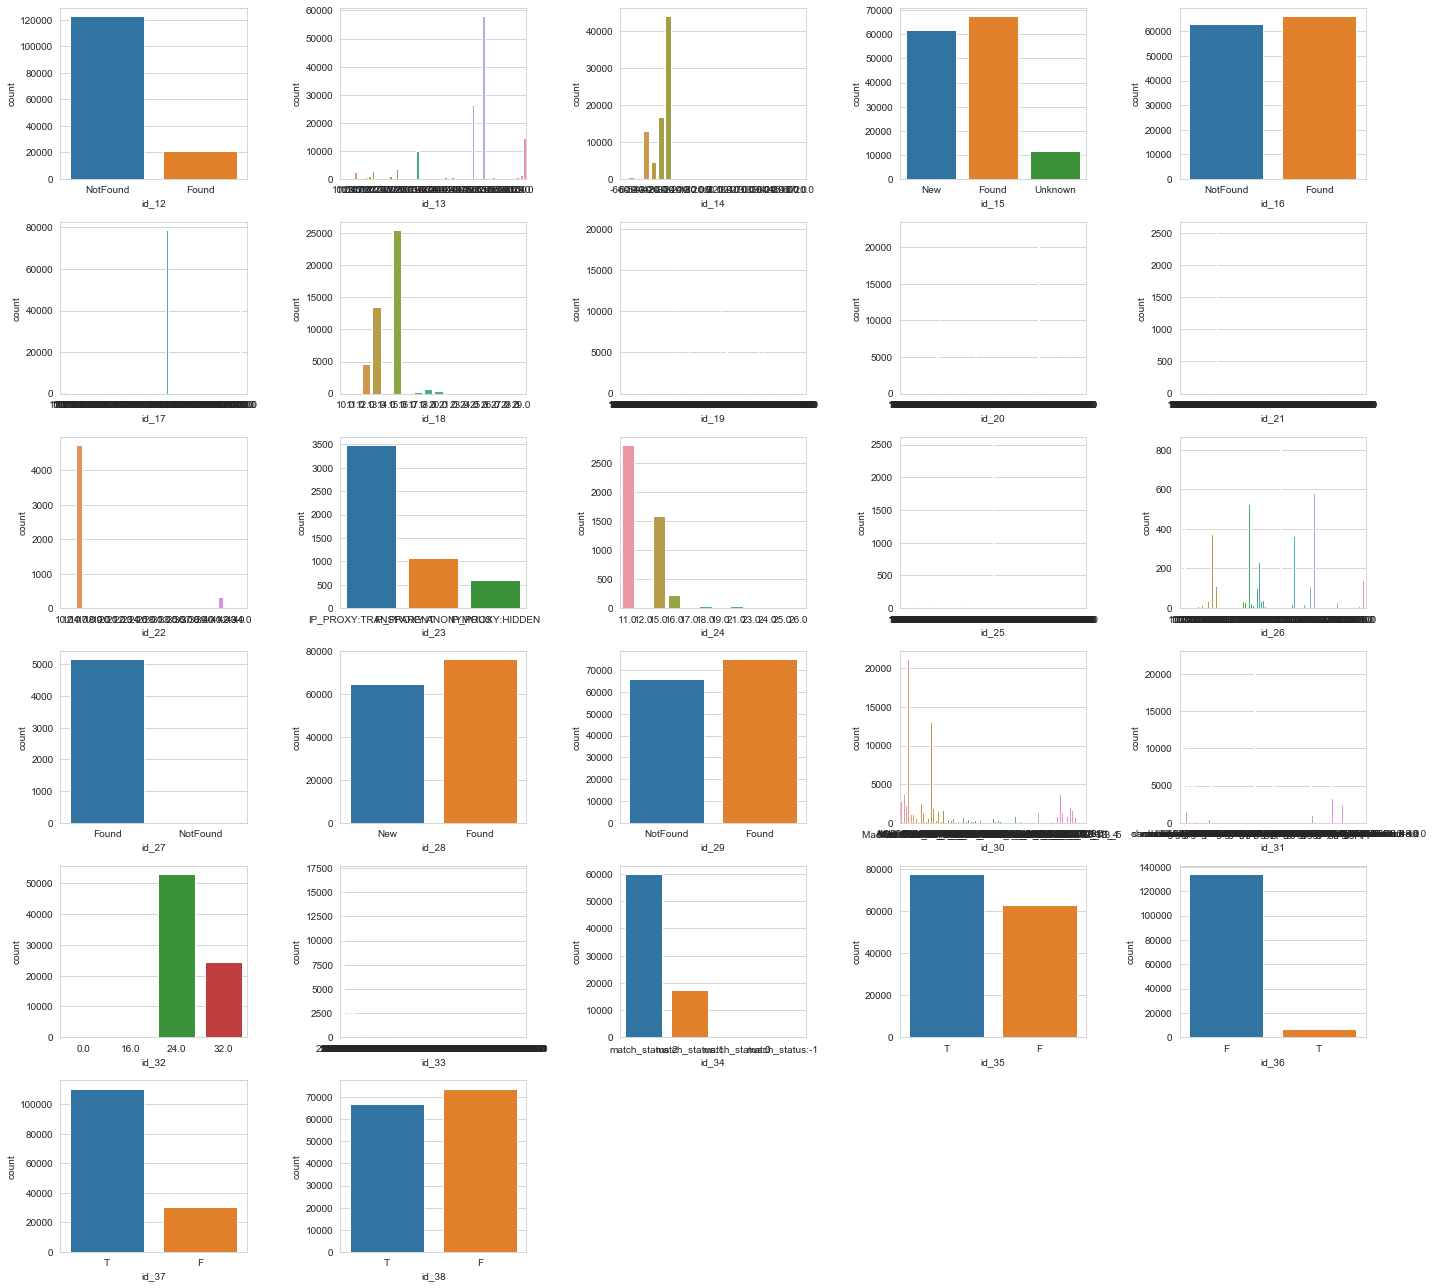

In [15]:
all_cols = train.columns
id_cat_cols = all_cols[all_cols.get_loc('id_12'):all_cols.get_loc('id_38')+1]
fig = plt.figure(figsize = (20,18))
for i in range(len(id_cat_cols)):
  fig.add_subplot(6, 5, i+1)
  sns.countplot(train[id_cat_cols[i]])

plt.tight_layout()
plt.show()

## Feature Creations

In [156]:
train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_std_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_std_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('std')

test['TransactionAmt_to_mean_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_mean_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_std_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_std_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('std')

train['id_02_to_mean_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('mean')
train['id_02_to_mean_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('mean')
train['id_02_to_std_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('std')
train['id_02_to_std_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('std')

test['id_02_to_mean_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('mean')
test['id_02_to_mean_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('mean')
test['id_02_to_std_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('std')
test['id_02_to_std_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('std')

train['D15_to_mean_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('mean')
train['D15_to_mean_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('mean')
train['D15_to_std_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('std')
train['D15_to_std_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('std')

test['D15_to_mean_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('mean')
test['D15_to_mean_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('mean')
test['D15_to_std_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('std')
test['D15_to_std_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('std')

train['D15_to_mean_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('mean')
train['D15_to_mean_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('mean')
train['D15_to_std_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('std')
train['D15_to_std_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('std')

test['D15_to_mean_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('mean')
test['D15_to_mean_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('mean')
test['D15_to_std_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('std')
test['D15_to_std_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('std')


In [157]:
#splitting email domains
train[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = train['P_emaildomain'].str.split('.', expand=True)
train[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = train['R_emaildomain'].str.split('.', expand=True)
test[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = test['P_emaildomain'].str.split('.', expand=True)
test[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = test['R_emaildomain'].str.split('.', expand=True)

In [18]:
train['P_emaildomain_3'].value_counts()

mx     2499
com     336
uk      161
jp       32
Name: P_emaildomain_3, dtype: int64

In [158]:
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
train = clean_inf_nan(train)
test = clean_inf_nan(test)

Preparing data for modelling

In [159]:
#collectiing column names with more than 90% null values
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

In [160]:
#collecting columns names with a unique value more than 90% 
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [161]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols+ one_value_cols_test))
cols_to_drop.remove('isFraud')
len(cols_to_drop)

84

In [162]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

In [163]:
X_train = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y_train = train.sort_values('TransactionDT')['isFraud']

X_test = test.drop(['TransactionDT', 'TransactionID'], axis=1)
test = test[["TransactionDT", 'TransactionID']]

In [164]:
del train, test
X_train.shape

(590540, 369)

In [121]:
len(X_train.select_dtypes(include='object').columns)

33

In [165]:
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
            'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']
remain_cat_cols = [col for col in cat_cols if col in X_train.columns]
len(remain_cat_cols)

45

In [166]:
X_train[remain_cat_cols] = X_train[remain_cat_cols].astype(str)
X_test[remain_cat_cols] = X_test[remain_cat_cols].astype(str)

In [167]:
all_cols = list(X_train.columns.values)
for name in remain_cat_cols:
    all_cols.remove(name)
num_cols = all_cols

In [168]:
from sklearn.preprocessing import LabelEncoder
for col in remain_cat_cols:
        le = LabelEncoder()
        le.fit(list(X_train[col].values) + list(X_test[col].values))
        X_train[col] = le.transform(list(X_train[col].values))
        X_test[col] = le.transform(list(X_test[col].values)) 

In [171]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
col_mean = np.nanmean(X_train, axis=0)
train_inds = np.where(np.isnan(X_train))
X_train[train_inds] = np.take(col_mean, train_inds[1])
test_inds = np.where(np.isnan(X_test))
X_test[test_inds] = np.take(col_mean, test_inds[1])

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_hat  = lr.predict(X_val)
error = mean_absolute_error(y_hat, y_val)

In [179]:
predictions = lr.predict_proba(X_test)

In [190]:
prediction

array([[0.97364716, 0.02635284],
       [0.97533734, 0.02466266],
       [0.96892155, 0.03107845],
       ...,
       [0.96890617, 0.03109383],
       [0.96565956, 0.03434044],
       [0.93940794, 0.06059206]])